In [5]:
# Tool to craw all files with a specific extension from a directory and subdirectories

# Load dependancies
from tkinter import filedialog
from tkinter import * # File dialog
from tkinter import messagebox as tkMessageBox # Error box (for WIN)
import os
import subprocess # Error box (for MacOS)
from czifile import CziFile # Import .czi files
import matplotlib.pyplot as plt # For plotting
from matplotlib.colors import LinearSegmentedColormap # Create own colormap
import numpy
import numpy as np
from shutil import copyfile # Copy file
import cv2
from skimage.color import rgb2gray
from skimage import img_as_ubyte
import glob # For importing multiple files


In [ ]:
# Determine operation system
# 'posix' = MacOS
# 'nt' = WIN
operation_sys = os.name

In [50]:
# User input
select_ext = '*.png'
output_ext = '.png'
# Export from model-zip (export_model_zip = 1) OR Export from RGB (export_model_zip = 0)
export_model_zip = 0

# COLOR MAP
# Define Color for merged label
bg_col = tuple([x/255 for x in (64, 224, 208)])
obj_col = tuple([x/255 for x in (255, 165, 0)])
bound_col = tuple([x/255 for x in (255, 0, 0)])

# Define Color
colors = [obj_col, bg_col, bound_col]  # R -> G -> B
n_bins = [1, 2, 3]  # Discretizes the interpolation into bins
cmap_name = 'my_list'
# Create the colormap
cm = LinearSegmentedColormap.from_list(cmap_name, colors)
# Fewer bins will result in "coarser" colomap interpolation
#plt.imshow(rgb_label, interpolation='nearest', origin='lower', cmap=cm)
    
# Maybe have a list of extensions grouped
# Check if input and label file has the same number of images

In [ ]:
# ALL DEFINED FUNCTIONS


# Read out all directories and files
def getListOfFiles(dirName):
    # create a list of file and sub directories 
    # names in the given directory 
    listOfFile = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
                
    return allFiles

if operation_sys == 'nt':
    # Error box (for WIN)
    def clicked():
        tkMessageBox.showerror("Error", "Unequal number of input images and label.")
elif operation_sys == 'posix':
    applescript = """
    display dialog "Unequal number of input images and label." ¬
    with title "Error" ¬
    with icon caution ¬
    buttons {"OK"}
    """

In [2]:
# Get user-specific folder selection
%gui tk
root = Tk()
root.withdraw()
root.update()
folder_selected = filedialog.askdirectory()
root.destroy() # Destroy root window

In [49]:
# Define Folder structure
# Output folder

# Images
imgFolder = 'Images'
# Labels_rgb
labelFolderRGB = 'Labels_rgb'
# Labels
labelFolder = 'Labels'

# ------------------------------------------------------------------------------------------ #
# Check for Folder

# Export folder name
export_folder_name = 'label_converted'
# Images
fgFolder_name = 'object'
# Labels_rgb
bgFolder_name = 'background'
# Labels
byFolder_name = 'boundary'

# Path for label folder
labelFolder = os.path.join(folder_selected, export_folder_name)
# Export folder
if os.path.exists( labelFolder ):
    print('Output: ##### Export label folder is available. #####')
else:
    os.makedirs( labelFolder )
    print('Output: ##### Create label folder called label_converted. #####')
    
    
    # Path for foreground folder (Object)
fgFolder = os.path.join(labelFolder, fgFolder_name)
# Export folder
if os.path.exists( fgFolder ):
    print('Output: ##### Export object folder is available. #####')
else:
    os.makedirs( fgFolder )
    print('Output: ##### Create object folder. #####')
    

# Path for background folder
bgFolder = os.path.join(labelFolder, bgFolder_name)
# Export folder
if os.path.exists( bgFolder ):
    print('Output: ##### Export background folder is available. #####')
else:
    os.makedirs( bgFolder )
    print('Output: ##### Create background folder. #####')
    

# Path for boundary folder
byFolder = os.path.join(labelFolder, byFolder_name)
# Export folder
if os.path.exists( byFolder ):
    print('Output: ##### Export boundary folder is available. #####')
else:
    os.makedirs( byFolder )
    print('Output: ##### Create boundary folder. #####')    
# ------------------------------------------------------------------------------------------ #


Output: ##### Export label folder is available. #####
Output: ##### Create object folder. #####
Output: ##### Create background folder. #####
Output: ##### Create boundary folder. #####


In [54]:
# Preallocate list
image_list = []
# Preallocate counter
counter = 0
# Obtain total number of images
n_total = len( glob.glob(os.path.join(folder_selected, select_ext)) )

for filename in glob.glob( os.path.join(folder_selected, select_ext) ):
    counter = counter + 1
    # Get filname without extension
    th_fname = os.path.splitext(os.path.basename(filename))[0]
    # Load image
    img = cv2.imread(filename)
    # Swap BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    
    ### Convert RGB to label mask and split them into single classes
    
    # the three channels
    r = np.array([255, 165, 0]) # Orange (object)
    g = np.array([64, 224, 208]) # Teal (background)
    b = np.array([255, 0, 0]) # Red (boundary)

    label_seg = np.zeros((test_img.shape[:2]), dtype=np.int)
    label_seg[(img==r).all(axis=2)] = 0 # Object
    label_seg[(img==g).all(axis=2)] = 1 # Background
    label_seg[(img==b).all(axis=2)] = 2 # Boundary

    # Preallocate image canvas
    fg_img = np.zeros(label_seg.shape)
    # Create binary mask for foreground (Object)
    fg_img[label_seg==0] = 255


    # Preallocate image canvas
    bg_img = np.zeros(label_seg.shape)
    # Create binary mask for background
    bg_img[label_seg==1] = 255


    # Preallocate image canvas
    by_img = np.zeros(label_seg.shape)
    # Create binary mask for boundary
    by_img[label_seg==2] = 255

    
    ### Export
    
    # Object mask
    cv2.imwrite(os.path.join(fgFolder, th_fname + '_' + fgFolder_name + output_ext), fg_img)
    # Background mask
    cv2.imwrite(os.path.join(bgFolder, th_fname + '_' + bgFolder_name + output_ext), bg_img)
    # Boundary mask
    cv2.imwrite(os.path.join(byFolder, th_fname + '_' + byFolder_name + output_ext), by_img)
    
    ### Print output
    print('Output: ##### Convert RGB2Label mask and saved: %d out of %d images. #####' % (counter, n_total) ) 
    
print('Output: ##### Cropping complete. #####')

Output: ##### Convert RGB2Label mask and saved: 1 out of 20 images. #####
Output: ##### Convert RGB2Label mask and saved: 2 out of 20 images. #####
Output: ##### Convert RGB2Label mask and saved: 3 out of 20 images. #####
Output: ##### Convert RGB2Label mask and saved: 4 out of 20 images. #####
Output: ##### Convert RGB2Label mask and saved: 5 out of 20 images. #####
Output: ##### Convert RGB2Label mask and saved: 6 out of 20 images. #####
Output: ##### Convert RGB2Label mask and saved: 7 out of 20 images. #####
Output: ##### Convert RGB2Label mask and saved: 8 out of 20 images. #####
Output: ##### Convert RGB2Label mask and saved: 9 out of 20 images. #####
Output: ##### Convert RGB2Label mask and saved: 10 out of 20 images. #####
Output: ##### Convert RGB2Label mask and saved: 11 out of 20 images. #####
Output: ##### Convert RGB2Label mask and saved: 12 out of 20 images. #####
Output: ##### Convert RGB2Label mask and saved: 13 out of 20 images. #####
Output: ##### Convert RGB2Label ma

In [13]:
image_list

[array([[[208, 224,  64],
         [208, 224,  64],
         [208, 224,  64],
         ...,
         [  0, 165, 255],
         [  0, 165, 255],
         [  0, 165, 255]],
 
        [[208, 224,  64],
         [208, 224,  64],
         [208, 224,  64],
         ...,
         [  0, 165, 255],
         [  0, 165, 255],
         [  0, 165, 255]],
 
        [[208, 224,  64],
         [208, 224,  64],
         [208, 224,  64],
         ...,
         [  0, 165, 255],
         [  0, 165, 255],
         [  0, 165, 255]],
 
        ...,
 
        [[  0, 165, 255],
         [  0, 165, 255],
         [  0, 165, 255],
         ...,
         [208, 224,  64],
         [208, 224,  64],
         [208, 224,  64]],
 
        [[  0, 165, 255],
         [  0, 165, 255],
         [  0, 165, 255],
         ...,
         [208, 224,  64],
         [208, 224,  64],
         [208, 224,  64]],
 
        [[  0, 165, 255],
         [  0, 165, 255],
         [  0, 165, 255],
         ...,
         [208, 224,  64],
  

In [22]:
test_img = image_list[1]

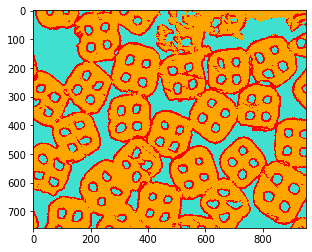

In [23]:
plt.imshow(test_img)

In [26]:
# the three channels
r = np.array([255, 165, 0]) # Orange (object)
g = np.array([64, 224, 208]) # Teal (background)
b = np.array([255, 0, 0]) # Red (boundary)

label_seg = np.zeros((test_img.shape[:2]), dtype=np.int)
label_seg[(img==r).all(axis=2)] = 0 # Object
label_seg[(img==g).all(axis=2)] = 1 # Background
label_seg[(img==b).all(axis=2)] = 2 # Boundary

# Preallocate image canvas
fg_img = np.zeros(label_seg.shape)
# Create binary mask for foreground (Object)
fg_img[label_seg==0] = 255


# Preallocate image canvas
bg_img = np.zeros(label_seg.shape)
# Create binary mask for background
bg_img[label_seg==1] = 255


# Preallocate image canvas
by_img = np.zeros(label_seg.shape)
# Create binary mask for boundary
by_img[label_seg==2] = 255



In [29]:
bg_img = np.zeros(label_seg.shape)

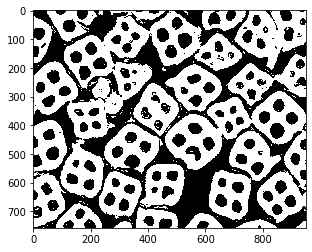

In [44]:
plt.imshow(fg_img, cmap='gray')